In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark=SparkSession.builder.getOrCreate()
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!mv rows.csv\?accessType\=DOWNLOAD reported_crimes.csv
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"
import findspark
findspark.init()


Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [83.1 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelea

In [4]:
df=spark.read.csv('reported_crimes.csv',header=True)
df.show(1,truncate=False)

+--------+-----------+----------------------+---------------+----+------------------+-----------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+
|ID      |Case Number|Date                  |Block          |IUCR|Primary Type      |Description                        |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude|Longitude|Location|
+--------+-----------+----------------------+---------------+----+------------------+-----------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+
|11034701|JA366925   |01/01/2001 11:00:00 AM|016XX E 86TH PL|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTITY THEFT OVER $ 300|RESIDENCE           |false 

In [0]:
import pyspark.sql.functions as F
from pyspark.sql.types import *
df=df.withColumn('Date',F.to_date('Date',format='MM/dd/yyyy hh:mm:ss a'))

In [6]:
df.show(2)

+--------+-----------+----------+------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|      Date|             Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+----------+------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01|   016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|        null|        null|2001|08/05/2017 03:

In [0]:
df=df.drop('Case Number')

In [9]:
df.show(1)

+--------+----------+---------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|      Date|          Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+----------+---------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|2001-01-01|016XX E 86TH PL|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|        null|        null|2001|08/05/2017 03:50:...|    null|     null|    null|
+--------+----------+-------

In [0]:
def renameCol(df,someCol):
  if ' ' in someCol:
    words=[l.lower() for l in someCol.split(' ')]
    newCol='_'.join(words)
    
  else:
    return someCol.lower()


In [0]:
for col in df.columns:
  newName=renameCol(col)
  df=df.withColumnRenamed(col,newName)

In [38]:
df.show()

+--------+----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      id|      date|               block|iucr|        primary_type|         description|location_description|arrest|domestic|beat|district|ward|community_area|fbi_code|x_coordinate|y_coordinate|year|          updated_on|latitude|longitude|location|
+--------+----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|2001-01-01|     016XX E 86TH PL|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|        null|        null|2001|08/05/2017 03:50:...|    null|     null|    null|


In [0]:
df.write.parquet('reported_crimes.parquet')

In [40]:
import os
os.path.abspath(os.curdir)

'/content'

In [41]:
import sys
sys.version

'3.6.9 (default, Nov  7 2019, 10:44:02) \n[GCC 8.3.0]'

In [0]:
df=spark.read.parquet('reported_crimes.parquet')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [44]:
df.show(3)

+--------+----------+--------------------+----+-------------------+------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      id|      date|               block|iucr|       primary_type| description|location_description|arrest|domestic|beat|district|ward|community_area|fbi_code|x_coordinate|y_coordinate|year|          updated_on|    latitude|    longitude|            location|
+--------+----------+--------------------+----+-------------------+------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11379979|2018-07-10| 012XX W OAKDALE AVE|1320|    CRIMINAL DAMAGE|  TO VEHICLE|              STREET| false|   false|1933|     019|  32|             6|      14|     1167489|     1919719|2018|07/18/2018 03:53:...|41.93

In [45]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- date: date (nullable = true)
 |-- block: string (nullable = true)
 |-- iucr: string (nullable = true)
 |-- primary_type: string (nullable = true)
 |-- description: string (nullable = true)
 |-- location_description: string (nullable = true)
 |-- arrest: string (nullable = true)
 |-- domestic: string (nullable = true)
 |-- beat: string (nullable = true)
 |-- district: string (nullable = true)
 |-- ward: string (nullable = true)
 |-- community_area: string (nullable = true)
 |-- fbi_code: string (nullable = true)
 |-- x_coordinate: string (nullable = true)
 |-- y_coordinate: string (nullable = true)
 |-- year: string (nullable = true)
 |-- updated_on: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- location: string (nullable = true)



# Exploratory Data Analysis


In [0]:
import seaborn as sns# requires conversion to pandas dataframe
import pandas as pd

In [0]:
sample=df.sample(False,0.25,666)

In [49]:
sample.count()

1767767

In [50]:
sample.show(2)

+--------+----------+-------------------+----+---------------+------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      id|      date|              block|iucr|   primary_type| description|location_description|arrest|domestic|beat|district|ward|community_area|fbi_code|x_coordinate|y_coordinate|year|          updated_on|    latitude|    longitude|            location|
+--------+----------+-------------------+----+---------------+------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11379979|2018-07-10|012XX W OAKDALE AVE|1320|CRIMINAL DAMAGE|  TO VEHICLE|              STREET| false|   false|1933|     019|  32|             6|      14|     1167489|     1919719|2018|07/18/2018 03:53:...|41.935261915|-87.65988029

In [51]:
sample.cache().count()
print(sample.is_cached)

True


In [0]:
crimes=sample.groupBy('primary_type').count()

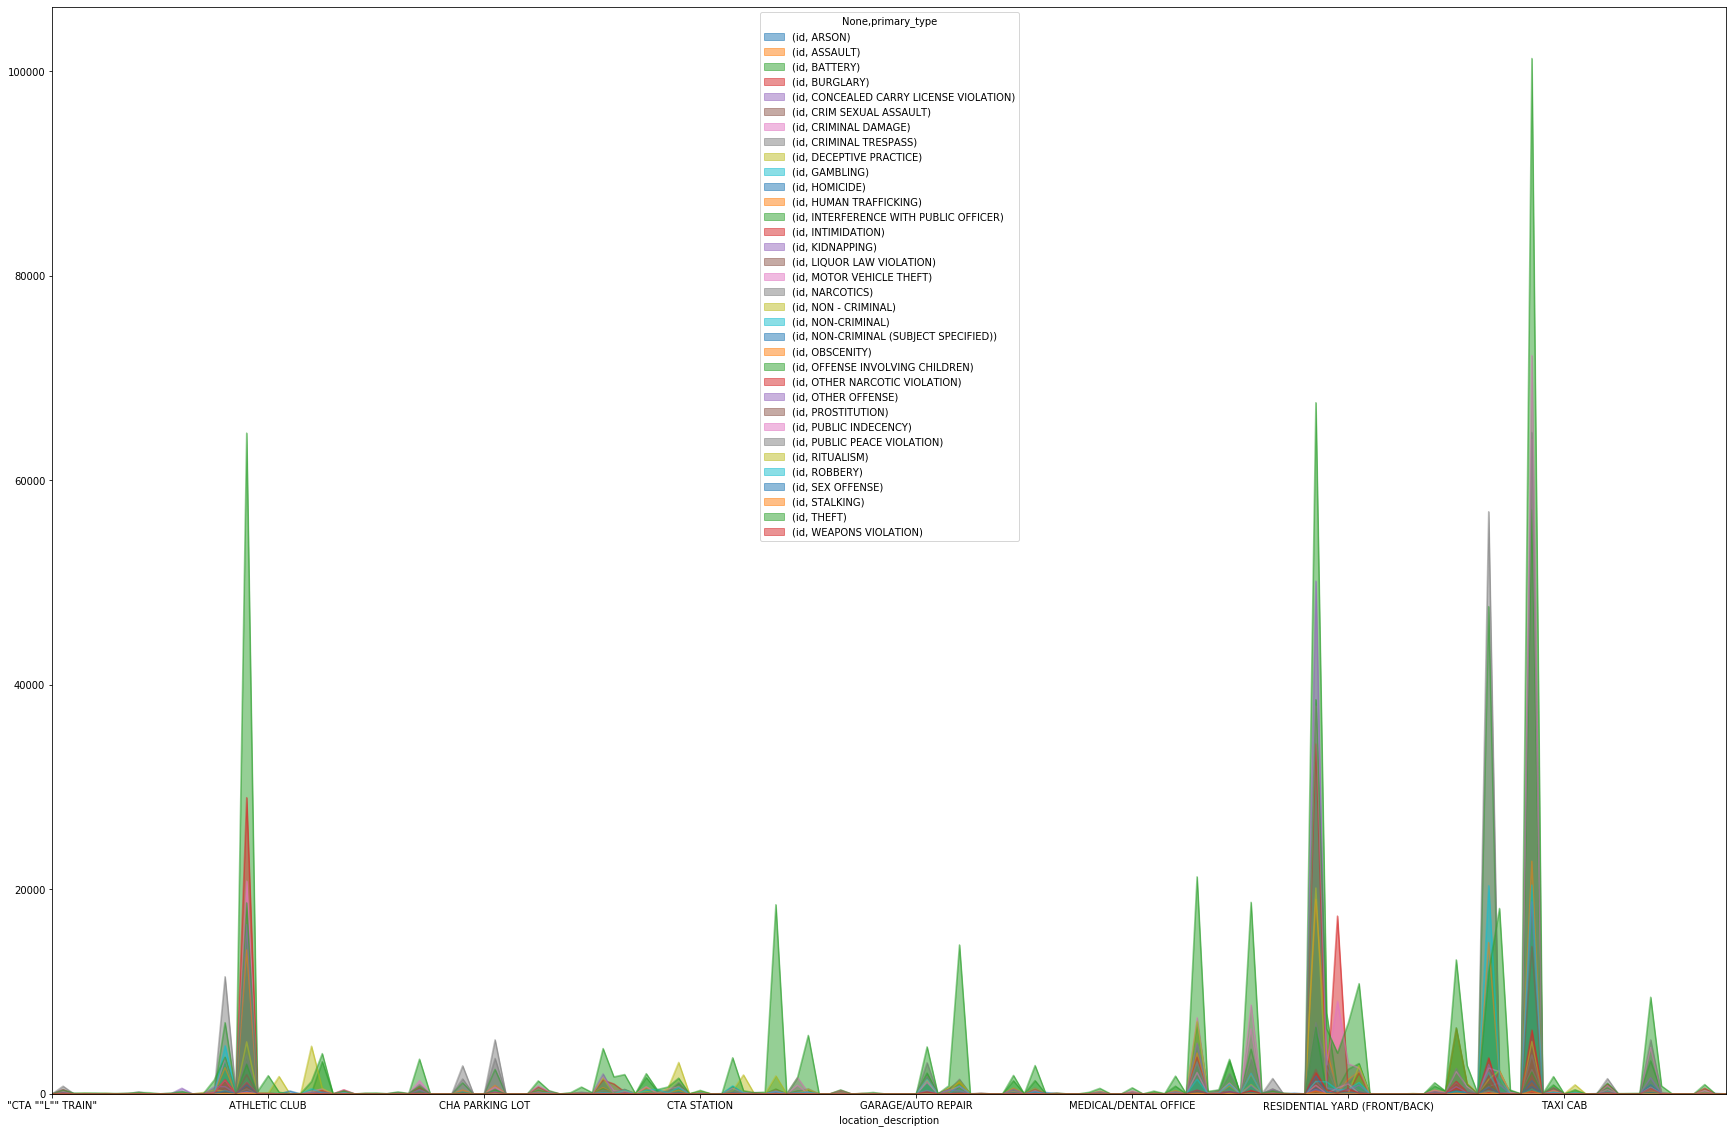

In [131]:
pivot.plot(kind='area',figsize=(30,20),stacked=False)

In [0]:
crimes=crimes.withColumnRenamed('count','crimes')

In [0]:
crimes=crimes.orderBy('crimes',ascending=False)

In [61]:
crimes.limit(10).show()

+-------------------+------+
|       primary_type|crimes|
+-------------------+------+
|              THEFT|373611|
|            BATTERY|323988|
|    CRIMINAL DAMAGE|200529|
|          NARCOTICS|181950|
|            ASSAULT|110942|
|      OTHER OFFENSE|109669|
|           BURGLARY|100239|
|MOTOR VEHICLE THEFT| 81198|
| DECEPTIVE PRACTICE| 71836|
|            ROBBERY| 66400|
+-------------------+------+



In [0]:
top10=crimes.limit(10).toPandas()

In [63]:
top10.head()

,primary_type,crimes
0,THEFT,373611
1,BATTERY,323988
2,CRIMINAL DAMAGE,200529
3,NARCOTICS,181950
4,ASSAULT,110942


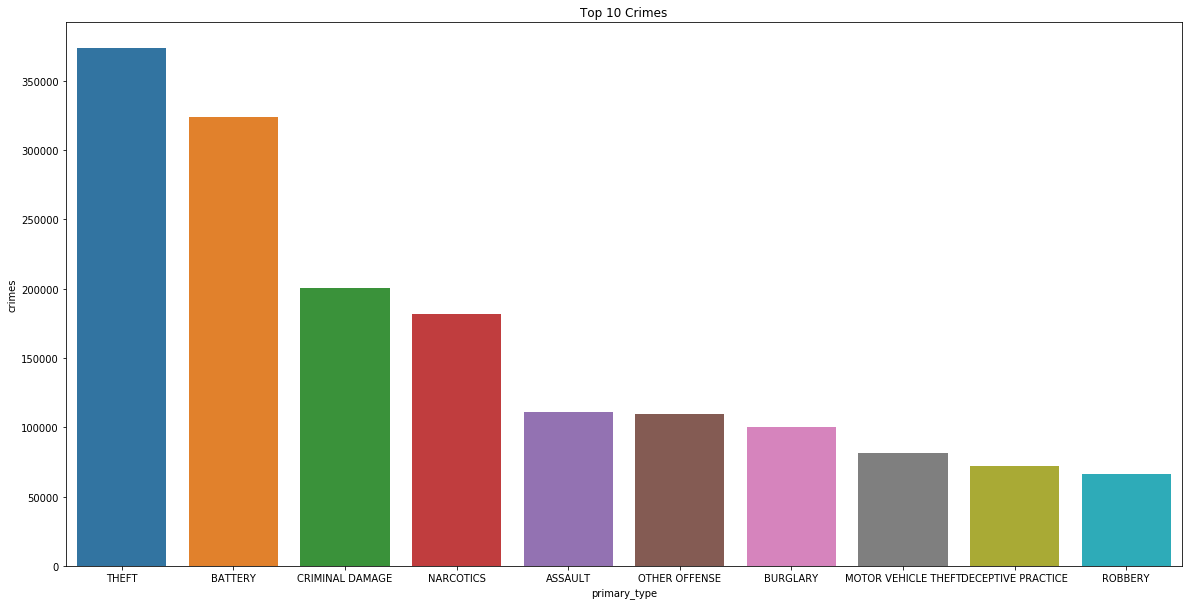

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.title('Top 10 Crimes')
sns.barplot(x=top10.primary_type,y=top10.crimes)

In [69]:
sample.show(20)

+--------+----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      id|      date|               block|iucr|        primary_type|         description|location_description|arrest|domestic|beat|district|ward|community_area|fbi_code|x_coordinate|y_coordinate|year|          updated_on|    latitude|    longitude|            location|
+--------+----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11379979|2018-07-10| 012XX W OAKDALE AVE|1320|     CRIMINAL DAMAGE|          TO VEHICLE|              STREET| false|   false|1933|     019|  32|             6|      14|     1167489|     191

In [70]:
sample.select('primary_type','description').show(2)

+---------------+------------+
|   primary_type| description|
+---------------+------------+
|CRIMINAL DAMAGE|  TO VEHICLE|
|          THEFT|RETAIL THEFT|
+---------------+------------+
only showing top 2 rows



# Pandas Pivot Table

In [0]:
crimes=sample.select('id','date','primary_type','description','location_description')

In [0]:
crimes=crimes.toPandas()

In [77]:
crimes.head()

,id,date,primary_type,description,location_description
0,11379979,2018-07-10,CRIMINAL DAMAGE,TO VEHICLE,STREET
1,11379981,2018-07-14,THEFT,RETAIL THEFT,DEPARTMENT STORE
2,11379983,2018-07-14,CRIMINAL TRESPASS,TO VEHICLE,STREET
3,11379992,2018-07-14,THEFT,$500 AND UNDER,APARTMENT
4,11380001,2018-07-14,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK


In [0]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [0]:
pivot=pd.pivot_table(index='location_description',columns='primary_type',values='id',aggfunc='count',data=crimes)

In [0]:
pivot.fillna(0,inplace=True)

In [147]:
pivot.head()

primary_type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
location_description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"""CTA """"L"""" TRAIN""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABANDONED BUILDING,58.0,17.0,93.0,417.0,1.0,87.0,265.0,420.0,25.0,26.0,11.0,0.0,13.0,0.0,2.0,5.0,5.0,756.0,0.0,0.0,0.0,0.0,9.0,0.0,112.0,3.0,0.0,31.0,0.0,38.0,17.0,0.0,359.0,65.0
AIRCRAFT,0.0,10.0,31.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,30.0,0.0,0.0,3.0,0.0,78.0,0.0
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,0.0,8.0,13.0,0.0,2.0,0.0,13.0,16.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,94.0,1.0
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,0.0,7.0,14.0,0.0,2.0,0.0,2.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,94.0,2.0


In [148]:
pivot.columns

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='primary_type')

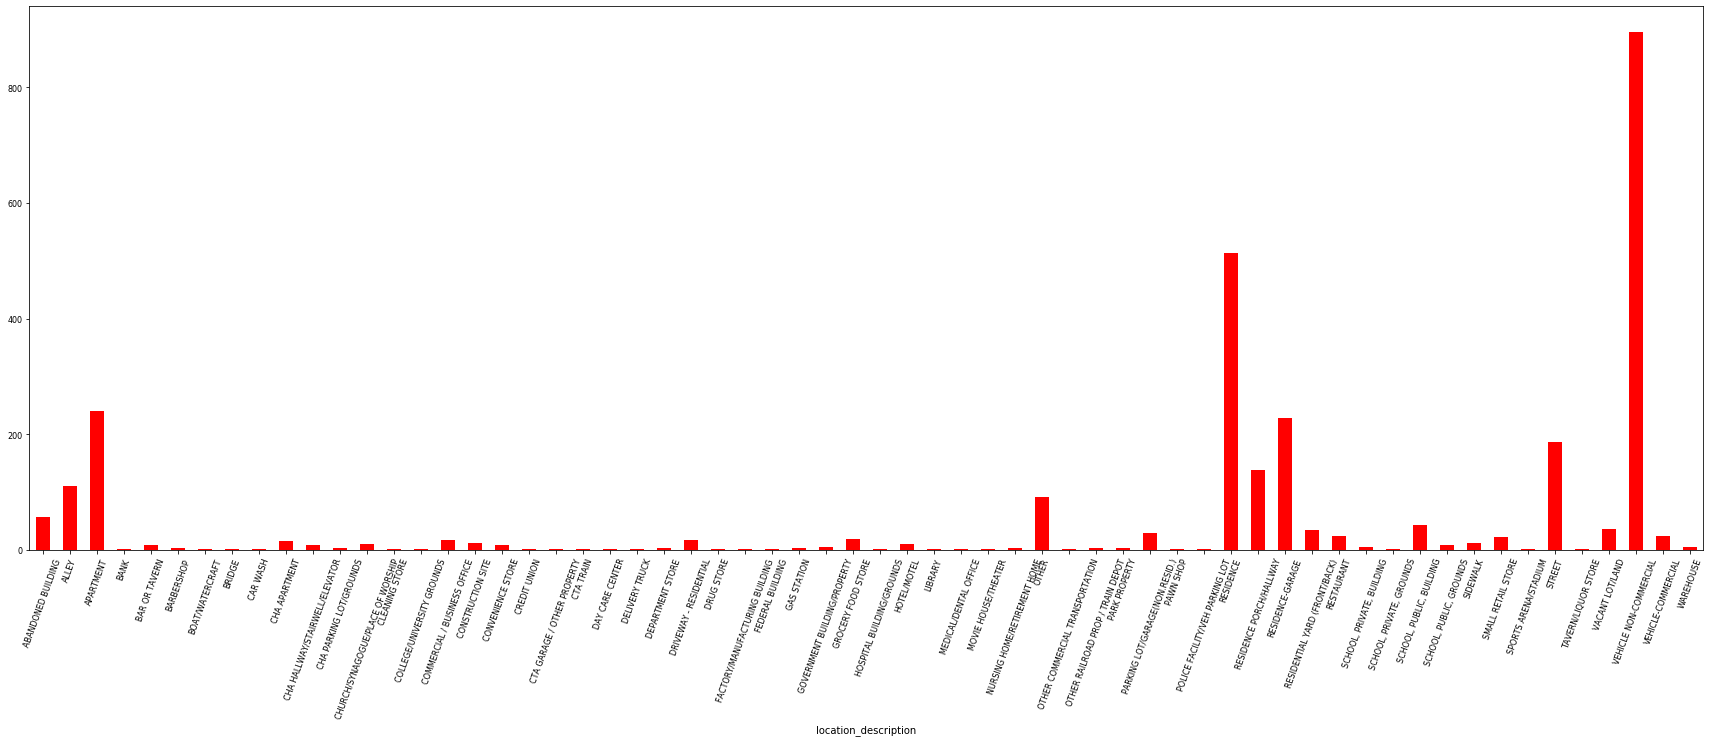

In [163]:
pivot[pivot.ARSON!=0]['ARSON'].plot(kind='bar',figsize=(30,10),rot=70,fontsize=8,colormap='autumn')

In [164]:
pivot.columns

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='primary_type')

In [165]:
pivot.head()

primary_type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
location_description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"""CTA """"L"""" TRAIN""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABANDONED BUILDING,58.0,17.0,93.0,417.0,1.0,87.0,265.0,420.0,25.0,26.0,11.0,0.0,13.0,0.0,2.0,5.0,5.0,756.0,0.0,0.0,0.0,0.0,9.0,0.0,112.0,3.0,0.0,31.0,0.0,38.0,17.0,0.0,359.0,65.0
AIRCRAFT,0.0,10.0,31.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,30.0,0.0,0.0,3.0,0.0,78.0,0.0
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,0.0,8.0,13.0,0.0,2.0,0.0,13.0,16.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,94.0,1.0
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,0.0,7.0,14.0,0.0,2.0,0.0,2.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,94.0,2.0


Text(0.5, 1, 'Analysis of Arson v.s. Homicide Locations')

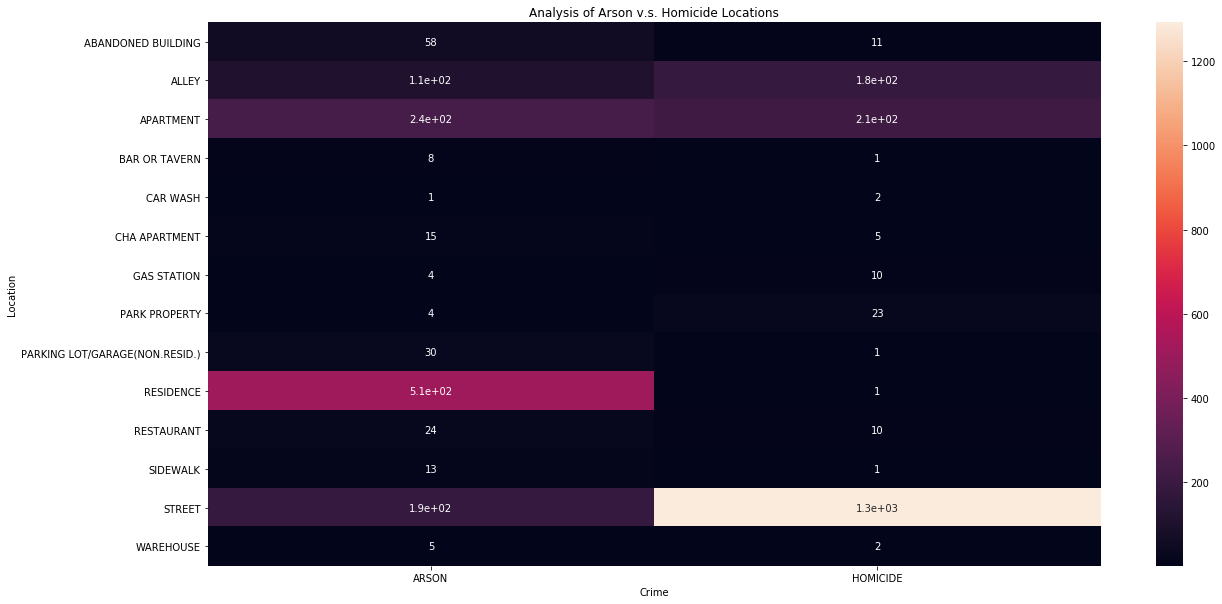

In [186]:
plt.figure(figsize=(20,10))
sns.heatmap(pivot[(pivot.ARSON!=0) & (pivot.HOMICIDE!=0)][['ARSON','HOMICIDE']],annot=True)
plt.xlabel('Crime')
plt.ylabel('Location')
plt.title('Analysis of Arson v.s. Homicide Locations')

In [181]:
pivot[(pivot.ARSON!=0) & (pivot.HOMICIDE!=0)][['ARSON','HOMICIDE']].loc[['APARTMENT','STREET']]

primary_type,ARSON,HOMICIDE
location_description,,
APARTMENT,241.0,213.0
STREET,187.0,1293.0


# SQL Pivot Table

In [0]:
crimes=sample.select('id','date','primary_type','description','location_description')

In [183]:
crimes.show(20)

+--------+----------+--------------------+--------------------+--------------------+
|      id|      date|        primary_type|         description|location_description|
+--------+----------+--------------------+--------------------+--------------------+
|11379979|2018-07-10|     CRIMINAL DAMAGE|          TO VEHICLE|              STREET|
|11379981|2018-07-14|               THEFT|        RETAIL THEFT|    DEPARTMENT STORE|
|11379983|2018-07-14|   CRIMINAL TRESPASS|          TO VEHICLE|              STREET|
|11379992|2018-07-14|               THEFT|      $500 AND UNDER|           APARTMENT|
|11380001|2018-07-14|           NARCOTICS| POSS: HEROIN(WHITE)|            SIDEWALK|
|11380003|2018-07-14|   WEAPONS VIOLATION|UNLAWFUL POSS OF ...|           RESIDENCE|
|11380004|2018-07-14|               THEFT|       FROM BUILDING|               OTHER|
|11380010|2018-07-14|     CRIMINAL DAMAGE|         TO PROPERTY|           APARTMENT|
|11380015|2018-07-13| MOTOR VEHICLE THEFT|          AUTOMOBILE|  

In [187]:
spark.catalog.listTables()

[]

In [0]:
crimes.createOrReplaceTempView(name='crimes')

In [190]:
crimes.show(2)

+--------+----------+---------------+------------+--------------------+
|      id|      date|   primary_type| description|location_description|
+--------+----------+---------------+------------+--------------------+
|11379979|2018-07-10|CRIMINAL DAMAGE|  TO VEHICLE|              STREET|
|11379981|2018-07-14|          THEFT|RETAIL THEFT|    DEPARTMENT STORE|
+--------+----------+---------------+------------+--------------------+
only showing top 2 rows



In [200]:
pivot.head()

primary_type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
location_description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"""CTA """"L"""" TRAIN""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABANDONED BUILDING,58.0,17.0,93.0,417.0,1.0,87.0,265.0,420.0,25.0,26.0,11.0,0.0,13.0,0.0,2.0,5.0,5.0,756.0,0.0,0.0,0.0,0.0,9.0,0.0,112.0,3.0,0.0,31.0,0.0,38.0,17.0,0.0,359.0,65.0
AIRCRAFT,0.0,10.0,31.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,30.0,0.0,0.0,3.0,0.0,78.0,0.0
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,0.0,8.0,13.0,0.0,2.0,0.0,13.0,16.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,94.0,1.0
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,0.0,7.0,14.0,0.0,2.0,0.0,2.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,94.0,2.0


In [252]:
crimes.groupBy('location_description').pivot('primary_type').count().show()

+--------------------+-----+-------+-------+--------+---------------------------------+-------------------+---------------+-----------------+------------------+--------+--------+-----------------+--------------------------------+------------+----------+--------------------+-------------------+---------+--------------+------------+--------------------------------+---------+--------------------------+------------------------+-------------+------------+----------------+----------------------+---------+-------+-----------+--------+-----+-----------------+
|location_description|ARSON|ASSAULT|BATTERY|BURGLARY|CONCEALED CARRY LICENSE VIOLATION|CRIM SEXUAL ASSAULT|CRIMINAL DAMAGE|CRIMINAL TRESPASS|DECEPTIVE PRACTICE|GAMBLING|HOMICIDE|HUMAN TRAFFICKING|INTERFERENCE WITH PUBLIC OFFICER|INTIMIDATION|KIDNAPPING|LIQUOR LAW VIOLATION|MOTOR VEHICLE THEFT|NARCOTICS|NON - CRIMINAL|NON-CRIMINAL|NON-CRIMINAL (SUBJECT SPECIFIED)|OBSCENITY|OFFENSE INVOLVING CHILDREN|OTHER NARCOTIC VIOLATION|OTHER OFFENSE|P

In [0]:
def simplePivot(df,index=None,column=None,aggfunc=None,value=None):
  resultant=df.groupBy(index).pivot(columns)
  functions={
      'count':lambda x:x.count(),
      'sum':lambda x,y:x.sum(y),
      'avg':lambda x,y:x.avg(y),
  }
  action=functions[aggfunc]
  return action(resultant,value) if value else action(resultant)

In [0]:
def transformiter(group_by=None,pivot_by=None,aggfunc='count'):
  transforms=[lambda x,y:x.groupBy(y),lambda x,y:x.pivot(y),lambda x:x.count()]#transformation pipeline
  params=[group_by,pivot_by,0]

  aggfuncs={'count':lambda x:x.append(lambda x:x.count())}#appends a transformation based on aggfunc argument
  aggfuncs[aggfunc](transforms)#adding new transformation to pipeline
  trans_index=0
  params_index=0

  def nextTransformAndParameter():#this is an iterator for transforms in the transformation pipeline and their paramters if any
    nonlocal trans_index,transforms,params,params_index
    param=None
    if params[params_index]!=0:
      param=params[trans_index]      
    transform=transforms[trans_index]
    trans_index+=1
    params_index+=1
    return [transform,param]

  return nextTransformAndParameter

nextTransformAndParameter=transformiter(group_by='location_description',pivot_by='primary_type')
for i in range(3):
  param=None
  transform=nextTransformAndParameter()
  if transform[1]:
    crimes=transform[0](crimes,transform[1])
  else:
    crimes=transform[0](crimes)

In [327]:
type(crimes)

pyspark.sql.dataframe.DataFrame

In [357]:
crimes.show()

+--------------------+-----+-------+-------+--------+---------------------------------+-------------------+---------------+-----------------+------------------+--------+--------+-----------------+--------------------------------+------------+----------+--------------------+-------------------+---------+--------------+------------+--------------------------------+---------+--------------------------+------------------------+-------------+------------+----------------+----------------------+---------+-------+-----------+--------+-----+-----------------+
|location_description|ARSON|ASSAULT|BATTERY|BURGLARY|CONCEALED CARRY LICENSE VIOLATION|CRIM SEXUAL ASSAULT|CRIMINAL DAMAGE|CRIMINAL TRESPASS|DECEPTIVE PRACTICE|GAMBLING|HOMICIDE|HUMAN TRAFFICKING|INTERFERENCE WITH PUBLIC OFFICER|INTIMIDATION|KIDNAPPING|LIQUOR LAW VIOLATION|MOTOR VEHICLE THEFT|NARCOTICS|NON - CRIMINAL|NON-CRIMINAL|NON-CRIMINAL (SUBJECT SPECIFIED)|OBSCENITY|OFFENSE INVOLVING CHILDREN|OTHER NARCOTIC VIOLATION|OTHER OFFENSE|P

In [0]:
nextTransformAndParameter=transformiter()

In [309]:
for i in range(3):
  param=None
  transform,param=nextTransformAndParameter()
  print(param)

None
None
None


In [0]:
def somefunc():
  return 2,None

In [0]:
a,b=somefunc()

In [0]:
nextTransform=transformiter('count')#transformiter is a function that generates an iterator

In [270]:
transformation=nextTransform()#nextTransform is an iterator that return the next transformation function to be applied

<function __main__.transformiter.<locals>.<lambda>.<locals>.<lambda>>

In [0]:
#each transform is a function that takes a dataframe as input and then outputs a processed df

In [272]:
from functools import reduce
def applyTransform(acc,curr):
  df=acc#here acc would be the df which will keep accumulating transformation results
  transform=curr()#here curr would be nextTranform
  return 
somelist=[1,2,3]
reduce(get_sum,somelist)

6

In [276]:
nextTransform()

<function __main__.transformiter.<locals>.<lambda>>

In [340]:
crimes=sample.select('id','date','primary_type','description','location_description')
#################################################################################################################################################


result=transformiter(crimes,group_by='location_description',pivot_by='primary_type',aggfunc='count',internal=False)

'''
for i in range(3):
  param=None
  transform=nextTransformAndParameter()
  if transform[1]:
    crimes=transform[0](crimes,transform[1])
  else:
    crimes=transform[0](crimes)
'''

'\nfor i in range(3):\n  param=None\n  transform=nextTransformAndParameter()\n  if transform[1]:\n    crimes=transform[0](crimes,transform[1])\n  else:\n    crimes=transform[0](crimes)\n'

In [0]:
s=func1()

In [333]:
s()

2

In [0]:
import time

In [378]:
def transformiter(df,group_by=None,pivot_by=None,aggfunc='count',internal=False):
  transforms=[lambda x,y:x.groupBy(y),lambda x,y:x.pivot(y)]#transformation pipeline
  params=[group_by,pivot_by,0]

  aggfuncs={'count':lambda x:x.append(lambda x:x.count())}#appends a transformation based on aggfunc argument
  aggfuncs[aggfunc](transforms)#adding new transformation to pipeline
  trans_index=0
  params_index=0
  def nextTransformAndParameter():#this is an iterator for transforms in the transformation pipeline and their paramters if any
    nonlocal trans_index,transforms,params,params_index
    param=None
    if params[trans_index]!=0:
      param=params[params_index]      
    transform=transforms[params_index]
    trans_index+=1
    params_index+=1
    return [transform,param]
  
  def applyTransforms(df):
    nonlocal transforms
    n=len(transforms)
    #print(n)
    nextTransformAndParameter=transformiter(df=df,group_by=group_by,pivot_by=pivot_by,aggfunc=aggfunc,internal=True)
    df2=df
    for i in range(n):
      param=None
      transform=nextTransformAndParameter()
      if transform[1]:
        df2=transform[0](df2,transform[1])
      else:
        df2=transform[0](df2)
    return df2
  return nextTransformAndParameter if internal==True else applyTransforms(df)

#Testing Above Function
start=time.time()
crimes=sample.select('id','date','primary_type','description','location_description')
result=transformiter(df=crimes,group_by='location_description',pivot_by='primary_type',aggfunc='count',internal=False)
result.show()
print(f'Time Taken {time.time()-start}')

+--------------------+-----+-------+-------+--------+---------------------------------+-------------------+---------------+-----------------+------------------+--------+--------+-----------------+--------------------------------+------------+----------+--------------------+-------------------+---------+--------------+------------+--------------------------------+---------+--------------------------+------------------------+-------------+------------+----------------+----------------------+---------+-------+-----------+--------+-----+-----------------+
|location_description|ARSON|ASSAULT|BATTERY|BURGLARY|CONCEALED CARRY LICENSE VIOLATION|CRIM SEXUAL ASSAULT|CRIMINAL DAMAGE|CRIMINAL TRESPASS|DECEPTIVE PRACTICE|GAMBLING|HOMICIDE|HUMAN TRAFFICKING|INTERFERENCE WITH PUBLIC OFFICER|INTIMIDATION|KIDNAPPING|LIQUOR LAW VIOLATION|MOTOR VEHICLE THEFT|NARCOTICS|NON - CRIMINAL|NON-CRIMINAL|NON-CRIMINAL (SUBJECT SPECIFIED)|OBSCENITY|OFFENSE INVOLVING CHILDREN|OTHER NARCOTIC VIOLATION|OTHER OFFENSE|P

In [377]:
def simplePivot(df,index=None,column=None,aggfunc=None,value=None):
  resultant=df.groupBy(index).pivot(column)
  functions={
      'count':lambda x:x.count(),
      'sum':lambda x,y:x.sum(y),
      'avg':lambda x,y:x.avg(y),
  }
  action=functions[aggfunc]
  return action(resultant,value) if value else action(resultant)
# Testing Function
start=time.time()
crimes=sample.select('id','date','primary_type','description','location_description')
result=simplePivot(df=crimes,index='location_description',column='primary_type',aggfunc='count')
result.show()
print(f'Time Taken {time.time()-start}')

+--------------------+-----+-------+-------+--------+---------------------------------+-------------------+---------------+-----------------+------------------+--------+--------+-----------------+--------------------------------+------------+----------+--------------------+-------------------+---------+--------------+------------+--------------------------------+---------+--------------------------+------------------------+-------------+------------+----------------+----------------------+---------+-------+-----------+--------+-----+-----------------+
|location_description|ARSON|ASSAULT|BATTERY|BURGLARY|CONCEALED CARRY LICENSE VIOLATION|CRIM SEXUAL ASSAULT|CRIMINAL DAMAGE|CRIMINAL TRESPASS|DECEPTIVE PRACTICE|GAMBLING|HOMICIDE|HUMAN TRAFFICKING|INTERFERENCE WITH PUBLIC OFFICER|INTIMIDATION|KIDNAPPING|LIQUOR LAW VIOLATION|MOTOR VEHICLE THEFT|NARCOTICS|NON - CRIMINAL|NON-CRIMINAL|NON-CRIMINAL (SUBJECT SPECIFIED)|OBSCENITY|OFFENSE INVOLVING CHILDREN|OTHER NARCOTIC VIOLATION|OTHER OFFENSE|P